In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_unit_vector(v):
    """Calculate unit vector from vector v."""
    magnitude = np.sqrt(np.sum(v**2))
    return v / magnitude

def find_perpendicular_vectors(v):
    """Find two perpendicular vectors to v."""
    v = calculate_unit_vector(v)
    
    if v[0] != 0 or v[1] != 0:
        v1 = np.array([-v[1], v[0], 0])
    else:
        v1 = np.array([1, 0, 0])
    v1 = calculate_unit_vector(v1)
    
    v2 = np.cross(v, v1)
    v2 = calculate_unit_vector(v2)
    
    return v1, v2

def find_center_point(vector_start, vector, initial_vertex):
    """Find the center point of the hexagon on the vector."""
    unit_v = calculate_unit_vector(vector)
    to_vertex = initial_vertex - vector_start
    projection = np.dot(to_vertex, unit_v)
    closest_point = vector_start + projection * unit_v
    return closest_point

def create_hexagon_vertices(center, radius, v1, v2):
    """Create vertices of a hexagon given center, radius, and two perpendicular vectors."""
    angles = np.linspace(0, 2 * np.pi, 6, endpoint=False)
    vertices = [center + radius * (np.cos(angle) * v1 + np.sin(angle) * v2) for angle in angles]
    return np.array(vertices)

def rotation_matrix_around_vector_7x7(start_point, vector, theta):
    """
    Compute the 7x7 rotation matrix around an arbitrary axis using the full transformation process.
    """
    u = vector / np.linalg.norm(vector)
    a, b, c = u
    
    T = np.eye(4)
    T[:3, 3] = -np.array(start_point)
    
    d = np.sqrt(b**2 + c**2)
    
    Rx = np.eye(4)
    if d != 0:
        Rx[1, 1] = c / d
        Rx[1, 2] = -b / d
        Rx[2, 1] = b / d
        Rx[2, 2] = c / d
    
    Ry = np.eye(4)
    Ry[0, 0] = d
    Ry[0, 2] = -a
    Ry[2, 0] = a
    Ry[2, 2] = d
    
    theta = np.radians(theta)
    Rz = np.eye(4)
    Rz[0, 0] = np.cos(theta)
    Rz[0, 1] = -np.sin(theta)
    Rz[1, 0] = np.sin(theta)
    Rz[1, 1] = np.cos(theta)
    
    Ry_inv = Ry.T
    Rx_inv = Rx.T
    T_inv = np.eye(4)
    T_inv[:3, 3] = np.array(start_point)
    
    R_final = T_inv @ Rx_inv @ Ry_inv @ Rz @ Ry @ Rx @ T
    
    R7 = np.eye(7)
    R7[:3, :3] = R_final[:3, :3]
    return R7

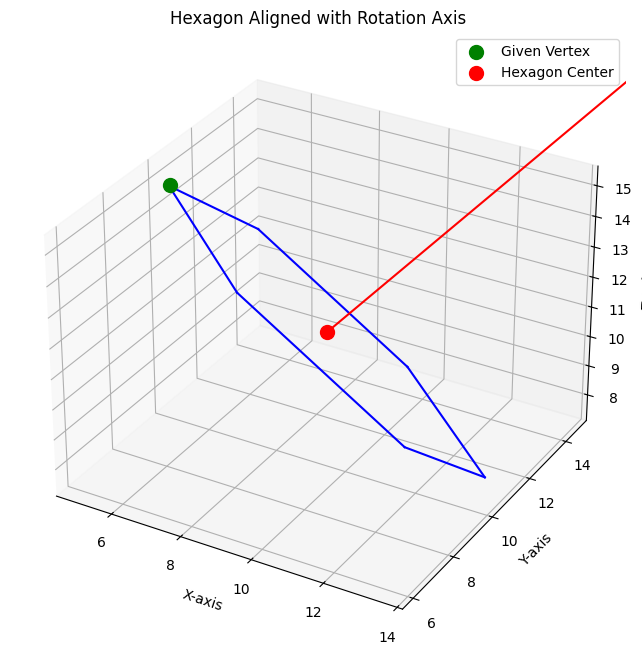

7x7 Rotation Matrix:
 [[ 0.62628866 -0.41526311  0.65978714  0.          0.          0.
   0.        ]
 [ 0.7039229   0.66494845 -0.24967199  0.          0.          0.
   0.        ]
 [-0.33504487  0.62080601  0.70876289  0.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          1.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.        ]]


In [3]:
def plot_hexagon(hexagon_vertices, center, vertex, vector):
    """ Plot the hexagon in 3D space """
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    num_sides = len(hexagon_vertices)
    for i in range(num_sides):
        x_vals = [hexagon_vertices[i, 0], hexagon_vertices[(i+1) % num_sides, 0]]
        y_vals = [hexagon_vertices[i, 1], hexagon_vertices[(i+1) % num_sides, 1]]
        z_vals = [hexagon_vertices[i, 2], hexagon_vertices[(i+1) % num_sides, 2]]
        ax.plot(x_vals, y_vals, z_vals, 'b')
    
    ax.quiver(center[0], center[1], center[2], vector[0], vector[1], vector[2], color='r', length=5, arrow_length_ratio=0.2)
    ax.scatter(vertex[0], vertex[1], vertex[2], color='g', s=100, label="Given Vertex")
    ax.scatter(center[0], center[1], center[2], color='r', s=100, label="Hexagon Center")
    
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("Hexagon Aligned with Rotation Axis")
    
    plt.legend()
    plt.show()

vertex = np.array([5, 10, 15])
rotation_axis_start = np.array([2, 2, 2])
vector = np.array([7, 8, 9])
theta = 60

center = find_center_point(rotation_axis_start, vector, vertex)
v1, v2 = find_perpendicular_vectors(vector)
radius = np.linalg.norm(vertex - center)
hexagon_vertices = create_hexagon_vertices(center, radius, v1, v2)
plot_hexagon(hexagon_vertices, center, vertex, vector)

R7 = rotation_matrix_around_vector_7x7(rotation_axis_start, vector, theta)
print("7x7 Rotation Matrix:\n", R7)